In [37]:
"""
Practical - Set up environment for ML
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [7]:
"""
Load Data
"""
diabetes = datasets.load_diabetes()

In [8]:
"""
Clean & Transform Data

For demonstration, we'll just use the first column of the diabetes data, which is normalized age
"""
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [9]:
"""
Split data into train and test data sets
"""
split_index = -20
# Split Features
diabetes_X_train = diabetes_X[:split_index]
diabetes_X_test = diabetes_X[split_index:]

# Split Labels
diabetes_y_train = diabetes.target[:split_index]
diabetes_y_test = diabetes.target[split_index:]

In [10]:
"""
Train Model
"""
# Initialize model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
"""
Make Predictions with Model
"""
# Note, we only use the test features!!
diabetes_y_pred = regr.predict(diabetes_X_test)

In [14]:
"""
Evaluate Model
"""
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07
Variance score: 0.47


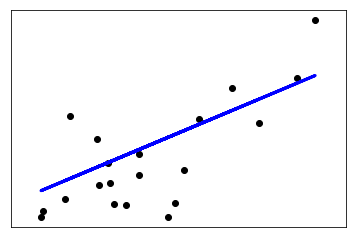

In [20]:
"""
Quick Peak at the data ..... who knows
"""
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [27]:
"""
Complete Pipeline all at once
"""

def run_complete_pipeline(split_index=-20):
    """All steps necessary to run a basic regression prediction on diabetic patients.
    
    Kwargs:
        split_index(int): how many rows to reserve for testing
        
    Returns:
        (float): mean squared error
    """
    # Load
    diabetes = datasets.load_diabetes()

    # Transform
    diabetes_X = diabetes.data[:, np.newaxis, 2]

    # Split
    diabetes_X_train = diabetes_X[:split_index]
    diabetes_X_test = diabetes_X[split_index:]
    diabetes_y_train = diabetes.target[:split_index]
    diabetes_y_test = diabetes.target[split_index:]

    # Train
    regr = linear_model.LinearRegression()
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Predict
    diabetes_y_pred = regr.predict(diabetes_X_test)
    
    # Evaluate
    return mean_squared_error(diabetes_y_test, diabetes_y_pred)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


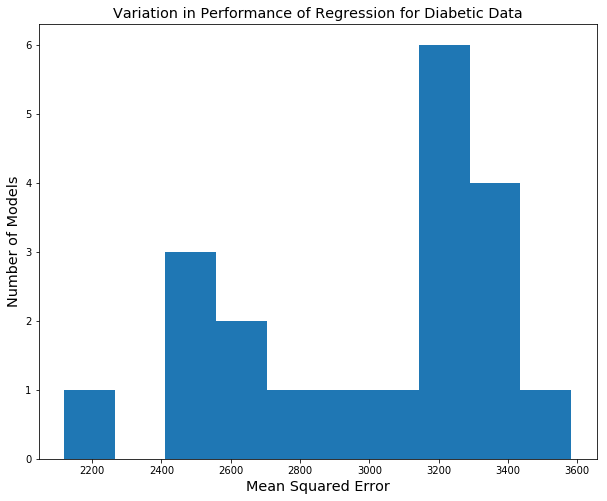

In [39]:
"""
Show the variation in performance, just with the simple split_index technique
"""
performance = [run_complete_pipeline(i) for i in range(-10, -50, -2)]

# Plot variation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
bins = ax.hist(performance)
ax.set_xlabel('Mean Squared Error', size='x-large')
ax.set_ylabel('Number of Models', size='x-large')
ax.set_title('Variation in Performance of Regression for Diabetic Data', size='x-large')
fig.show()